In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land","landed"]) 
    ax.yaxis.set_ticklabels(["did not land","landed"])
    plt.show()

In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
data.shape

(90, 18)

In [7]:
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

In [8]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
X.shape

(90, 83)

In [10]:
Y = data["Class"].to_numpy()

In [11]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [12]:
type(Y)

numpy.ndarray

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype("float"))

In [14]:
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
X_train.shape

(72, 83)

In [17]:
X_test.shape

(18, 83)

In [18]:
Y_train.shape

(72,)

In [19]:
Y_test.shape

(18,)

In [20]:
parameters = {"C":[0.01,0.1,1], "penalty":["l2"], "solver":["lbfgs"]}

In [21]:
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [25]:
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logreg_best_score = logreg_cv.best_score_
print("Accuracy :",logreg_best_score)

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


In [26]:
lr_score = logreg_cv.score(X_test, Y_test)

In [27]:
print("Logistic Regression - Accuracy using method score:", lr_score)

Logistic Regression - Accuracy using method score: 0.8333333333333334


In [28]:
yhat = logreg_cv.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

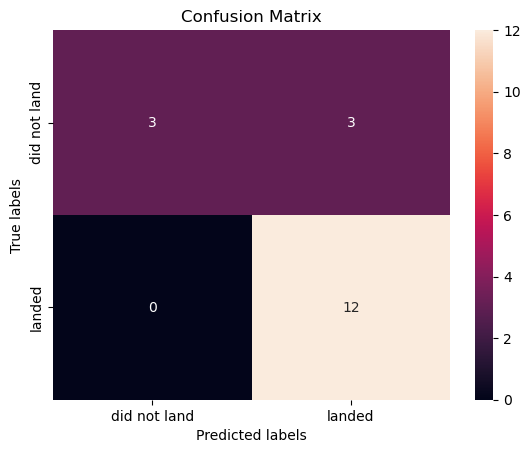

In [29]:
plot_confusion_matrix(Y_test, yhat)

In [30]:
parameters = {"kernel":("linear", "rbf","poly","rbf", "sigmoid"), "C": np.logspace(-3, 3, 5), "gamma":np.logspace(-3, 3, 5)}
svm = SVC()

In [31]:
gridsearch_cv_svm = GridSearchCV(svm, parameters, scoring="accuracy", cv=10)
svm_cv = gridsearch_cv_svm.fit(X_train, Y_train)

In [32]:
print("Tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
svm_best_score = svm_cv.best_score_
print("Accuracy :",svm_best_score)

Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


In [33]:
svm_score = svm_cv.score(X_test, Y_test)

In [34]:
print("SVM - Accuracy using method score:", svm_score)

SVM - Accuracy using method score: 0.8333333333333334


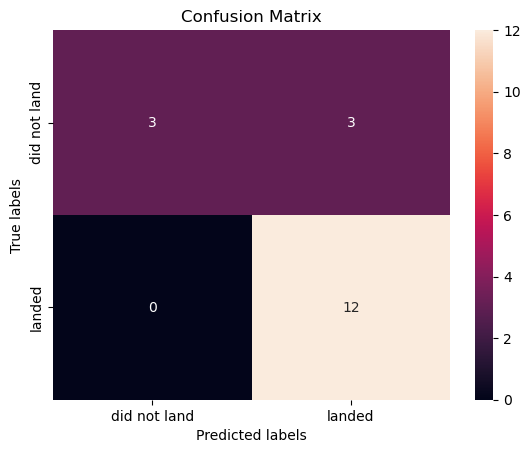

In [35]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [50]:
parameters = {"criterion":["gini","entropy"], "splitter":["best","random"], "max_depth":[2*n for n in range(1,10)],
             "max_features":["log2","sqrt"], "min_samples_leaf":[1,2,4], "min_samples_split":[2,5,10]}
tree = DecisionTreeClassifier()
gridsearch_cv_tree = GridSearchCV(tree, parameters, scoring="accuracy", cv=10)
tree_cv = gridsearch_cv_tree.fit(X_train, Y_train)

In [51]:
print("Tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score = tree_cv.best_score_
print("Accuracy :",tree_best_score)

Tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy : 0.875


In [52]:
tree_score = tree_cv.score(X_test, Y_test)

In [53]:
print("DecisionTreeClassifier - Accuracy using method score:", tree_score)

DecisionTreeClassifier - Accuracy using method score: 0.8333333333333334


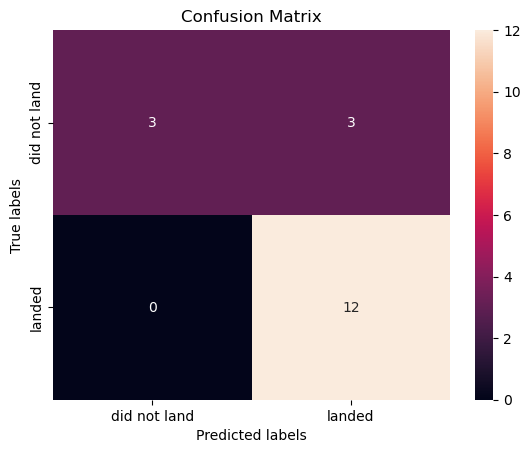

In [54]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [55]:
parameters = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10], "algorithm":["auto","ball_tree","kd_tree","brute"], "p":[1,2]}
KNN = KNeighborsClassifier()

In [56]:
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [57]:
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
knn_best_score = knn_cv.best_score_
print("Accuracy :",knn_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


In [58]:
knn_score = knn_cv.score(X_test, Y_test)

In [59]:
print("KNeighborsClassifier - Accuracy using method score:", knn_score)

KNeighborsClassifier - Accuracy using method score: 0.8333333333333334


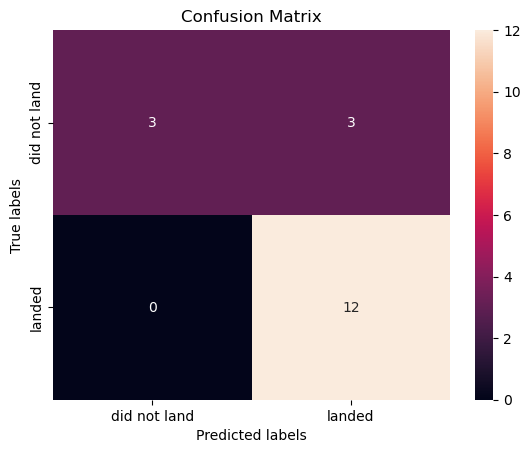

In [60]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [61]:
column_names = ["Algorithm", "Accuracy Score", "Best Score"]
algorithms = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "K-Nearest Neighbours"]
scores = [lr_score, svm_score, tree_score, knn_score]
best_scores = [logreg_best_score, svm_best_score, tree_best_score, knn_best_score]

In [62]:
result_df = pd.DataFrame(list(zip(algorithms, scores, best_scores)), columns = column_names)

In [63]:
result_df

,Algorithm,Accuracy Score,Best Score
0,Logistic Regression,0.833333,0.846429
1,Support Vector Machine,0.833333,0.848214
2,Decision Tree,0.833333,0.875000
3,K-Nearest Neighbours,0.833333,0.848214


In [64]:
sns.set(style="whitegrid")

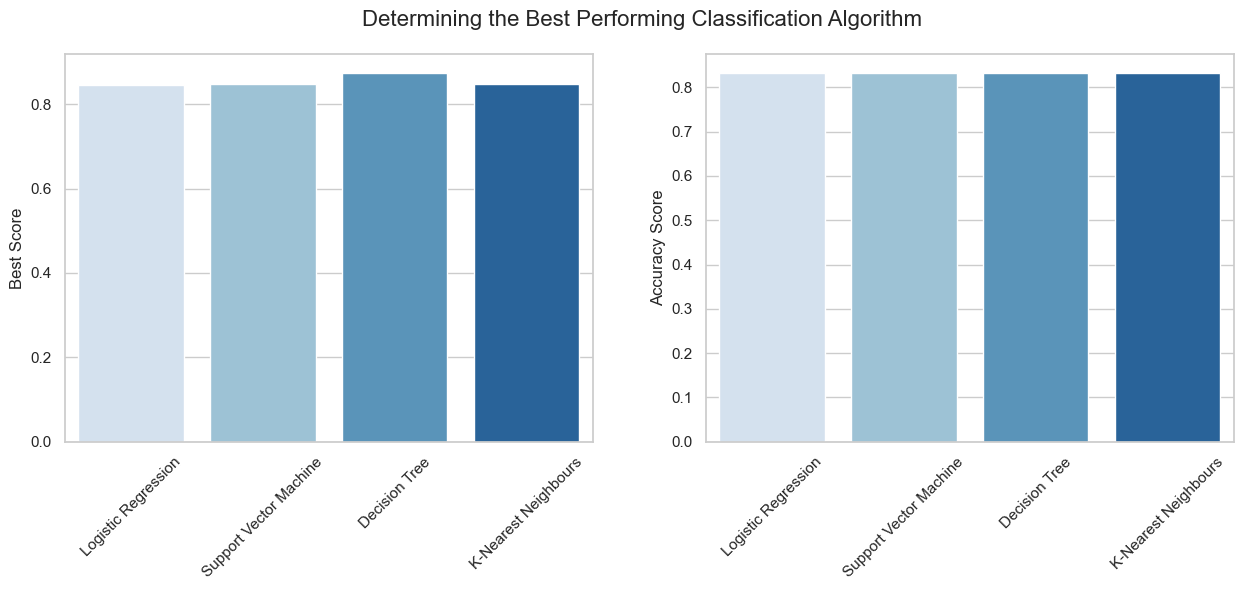

In [82]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.ylabel("Best Score")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=algorithms, y=scores, palette="Blues")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)

plt.subplots_adjust(wspace=5)
plt.suptitle("Determining the Best Performing Classification Algorithm", fontsize=16)
plt.tight_layout()
plt.show()